# A quick demo of dabl on some toy datasets and slightly more interesting datasets

# Scikit-learn build-in datasets:

## Boston housing regression

In [1]:
import dabl
from sklearn.datasets import load_boston
boston = load_boston()
# create a dataframe from an sklearn dataset bunch
boston_df = dabl.utils.data_df_from_bunch(boston)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:568: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 3 outliers in column CRIM.
  int(dropped), series.name), UserWarning)


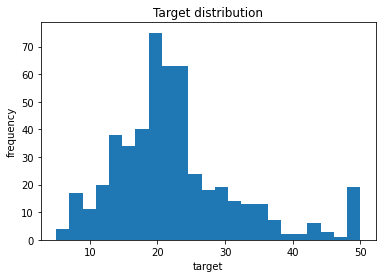

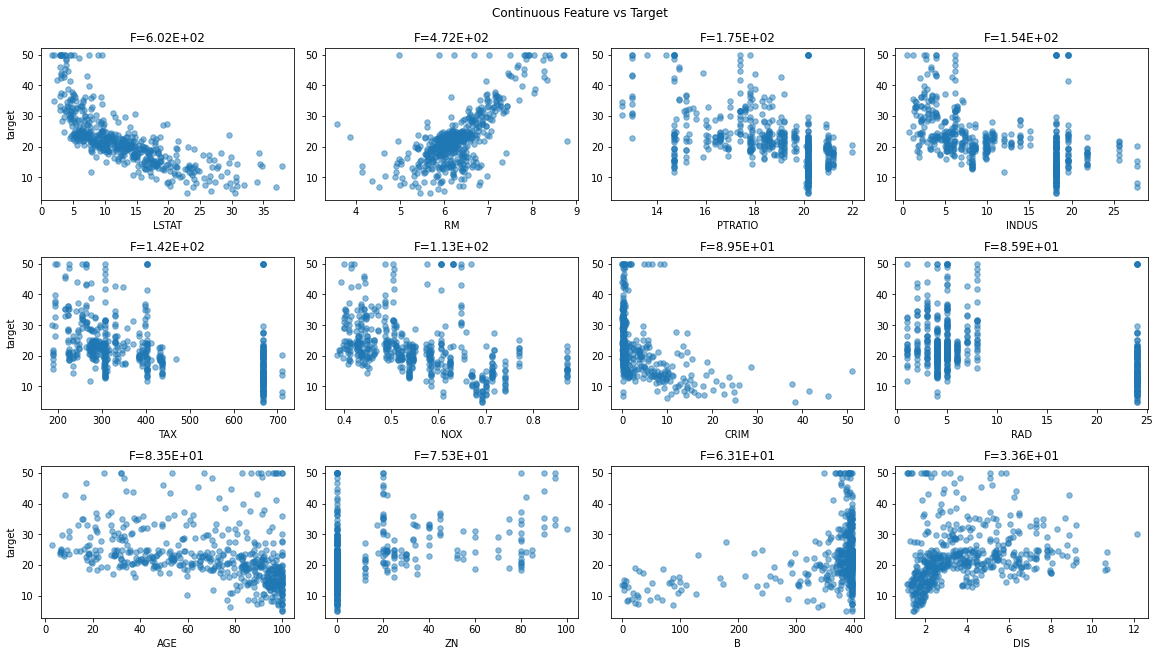

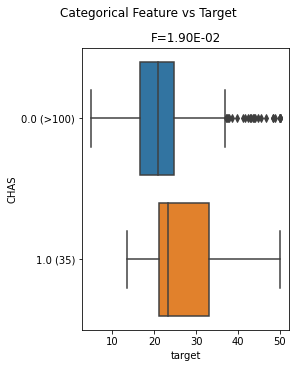

In [2]:
dabl.plot(boston_df, 'target')

Rad is detected as categorical, which might make sense. If you disagree, you can specify it to be continuous:

/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:568: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 3 outliers in column CRIM.
  int(dropped), series.name), UserWarning)


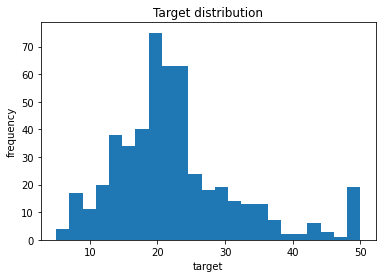

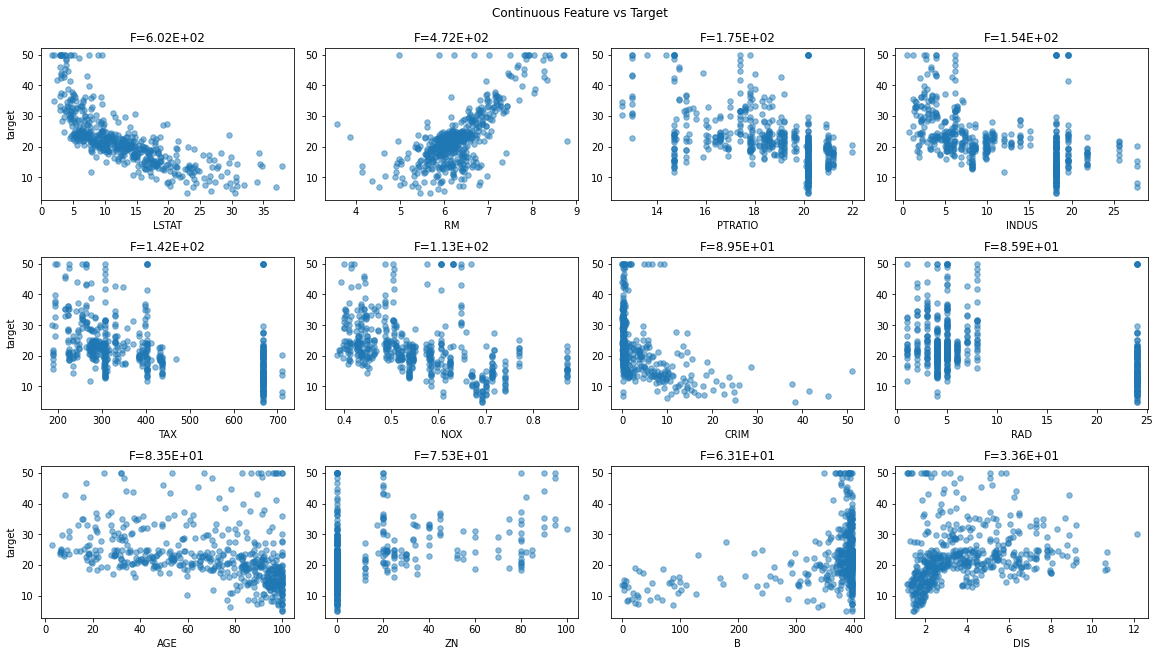

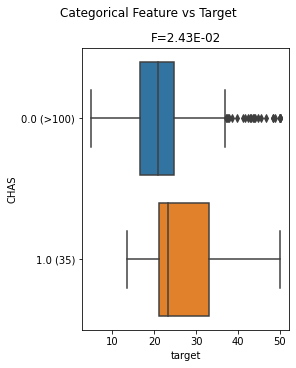

In [3]:
dabl.plot(boston_df, 'target', type_hints={'RAD': 'continuous'})

In [4]:
sr = dabl.SimpleRegressor()
sr.fit(boston_df, target_col='target')

Running DummyRegressor()
r2: -0.009 neg_mean_squared_error: -84.632
=== new best DummyRegressor() (using r2):
r2: -0.009 neg_mean_squared_error: -84.632

Running DecisionTreeRegressor(max_depth=1)
r2: 0.333 neg_mean_squared_error: -55.532
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.333 neg_mean_squared_error: -55.532

Running DecisionTreeRegressor(max_depth=5)
r2: 0.750 neg_mean_squared_error: -21.063
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.750 neg_mean_squared_error: -21.063

Running Ridge(alpha=10)
r2: 0.724 neg_mean_squared_error: -23.469
Running Lasso(alpha=10)
r2: -0.009 neg_mean_squared_error: -84.632

Best model:
DecisionTreeRegressor(max_depth=5)
Best Scores:
r2: 0.750 neg_mean_squared_error: -21.063


SimpleRegressor(random_state=None, refit=True, shuffle=True, type_hints=None,
                verbose=1)

In [5]:
# highly regularized ridge won. r^2 of .5 is not great but also not terrible.
# the fast regression models are not really thought-through yet.
# still we can look at coefficients.
dabl.explain(sr)

In [6]:
# The top features shown in the plot (using f test) also have the largest (absolute) coefficient values, lstat and RM.
# only the top 10 coefficients are shown right now. Clearly we could do better by adding non-linear transformations to the data from the plots above.
# future work!

## Wine classification

In [7]:
from sklearn.datasets import load_wine
wine_df = dabl.utils.data_df_from_bunch(load_wine())
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:568: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification
Linear Discriminant Analysis training set score: 1.000


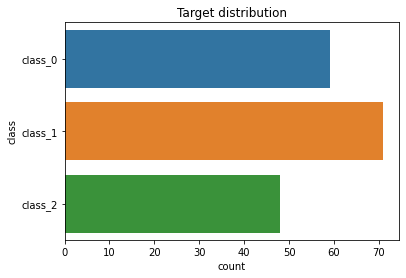

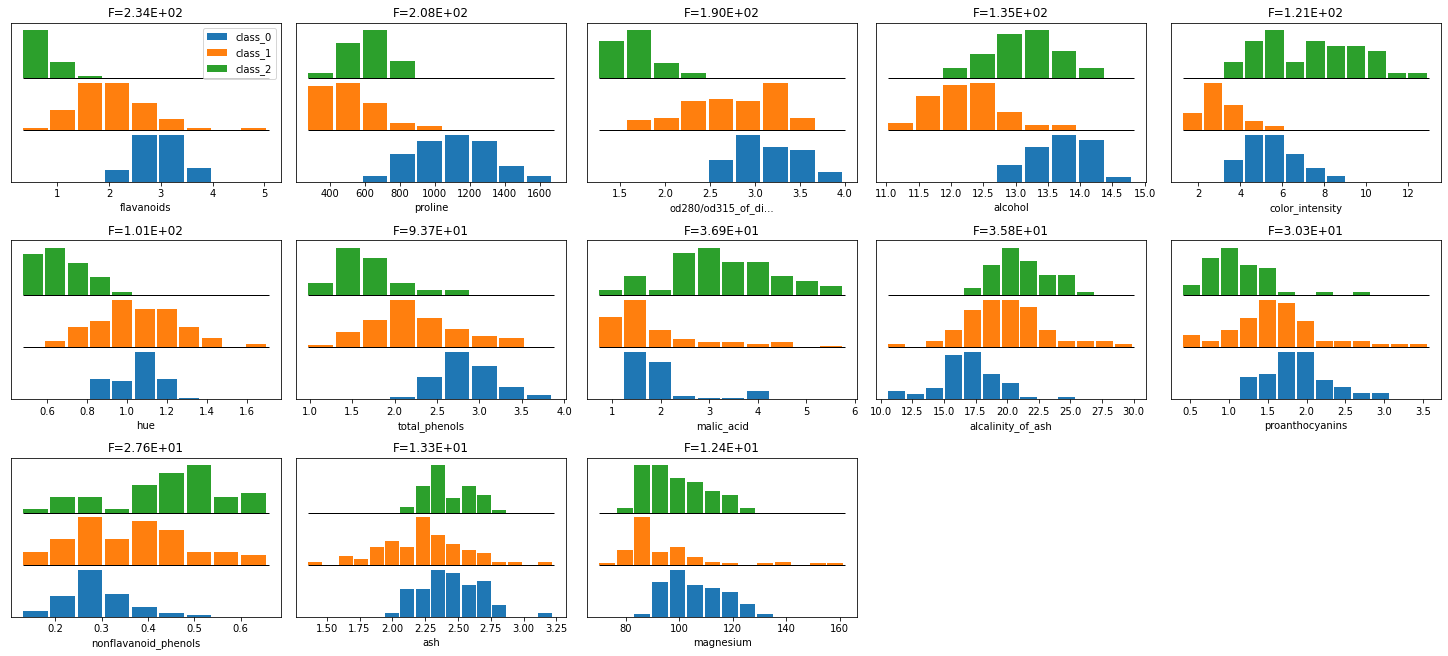

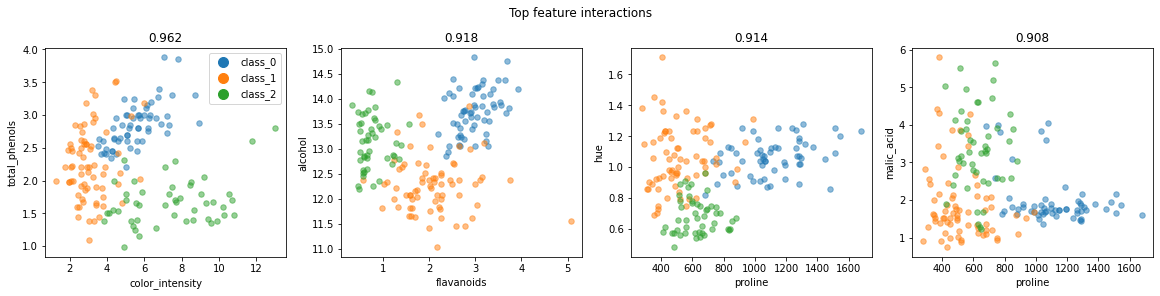

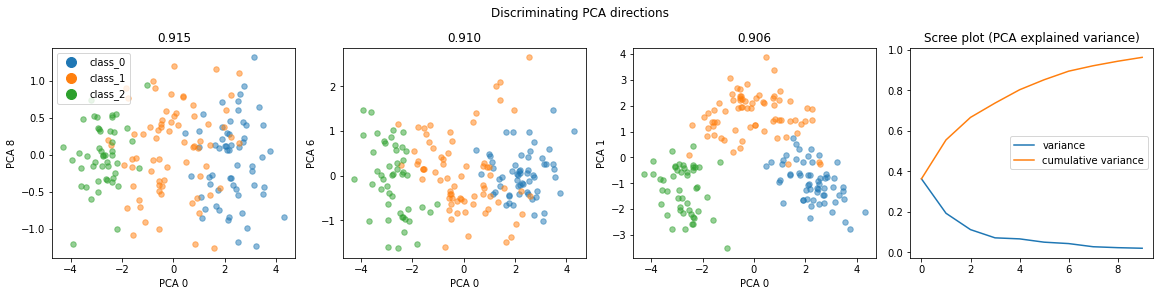

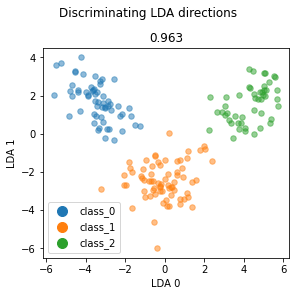

In [8]:
dabl.plot(wine_df, 'target')

In [9]:
# obviously LDA solved the problem as we can see in the last plot. I might just want to use LDA or another linear model.
# Or we see what the SimpleClassifier does:
sc = dabl.SimpleClassifier()
sc.fit(wine_df, target_col='target')

Running DummyClassifier(strategy='prior')
accuracy: 0.399 recall_macro: 0.333 precision_macro: 0.133 f1_macro: 0.190
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.399 recall_macro: 0.333 precision_macro: 0.133 f1_macro: 0.190

Running GaussianNB()
accuracy: 0.961 recall_macro: 0.965 precision_macro: 0.963 f1_macro: 0.962
=== new best GaussianNB() (using recall_macro):
accuracy: 0.961 recall_macro: 0.965 precision_macro: 0.963 f1_macro: 0.962

Running MultinomialNB()
accuracy: 0.933 recall_macro: 0.936 precision_macro: 0.942 f1_macro: 0.936
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.584 recall_macro: 0.646 precision_macro: 0.438 f1_macro: 0.508
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.938 recall_macro: 0.943 precision_macro: 0.942 f1_macro: 0.939
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.960 recall_macro: 0.960 precision_m

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

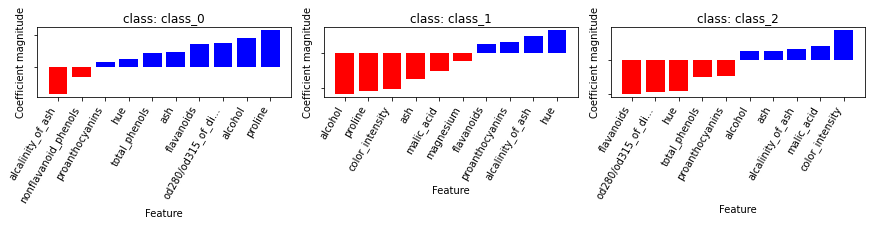

In [10]:
# logistic regression has slightly higher accuracy and macro-average recall (which is the main metric we use)
# than linear discriminant analysis. Not really a shocker.
dabl.explain(sc)

Interestingly the large coefficients don't really correspond to what's shown in the univariate or pairplots. Possibly because the data is very correlated? Who knows!
I assume we could create a simpler model with less features from the plots above. Maybe lasso next time?

## Ames housing dataset

In [11]:
ames_df = dabl.datasets.load_ames()
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:568: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/preprocessing.py:344: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 26 continuous features


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 5 outliers in column Gr Liv Area.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 1 outliers in column Garage Cars.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 2 outliers in column Total Bsmt SF.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 4 outliers in column 1st Flr SF.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 1 outliers in column Garage Yr Blt.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 7 outliers in column Mas Vnr A

Showing only top 10 of 42 categorical features


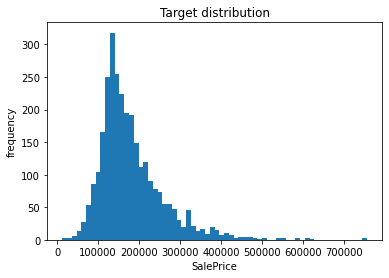

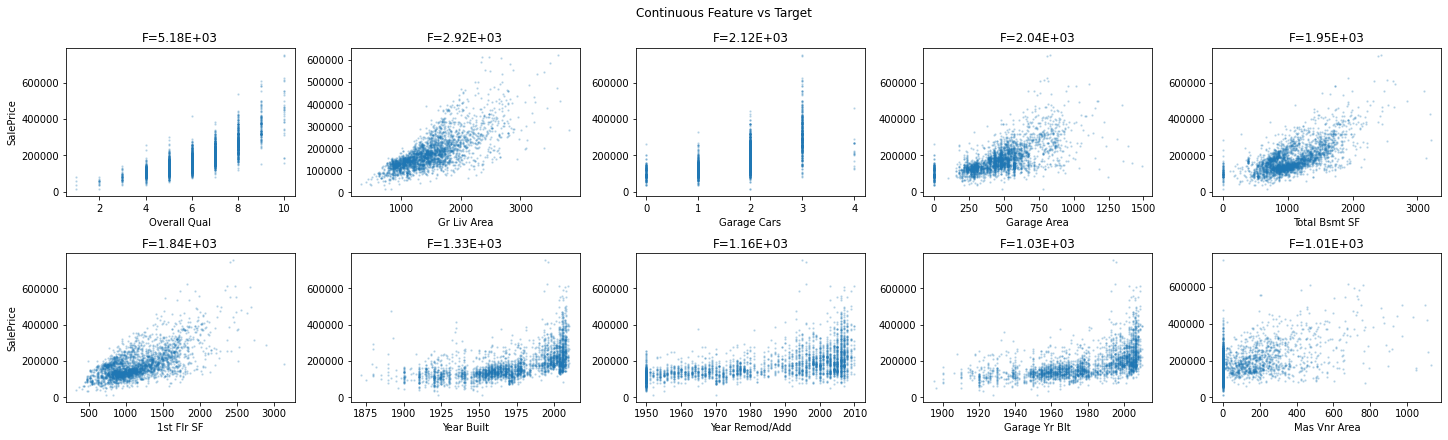

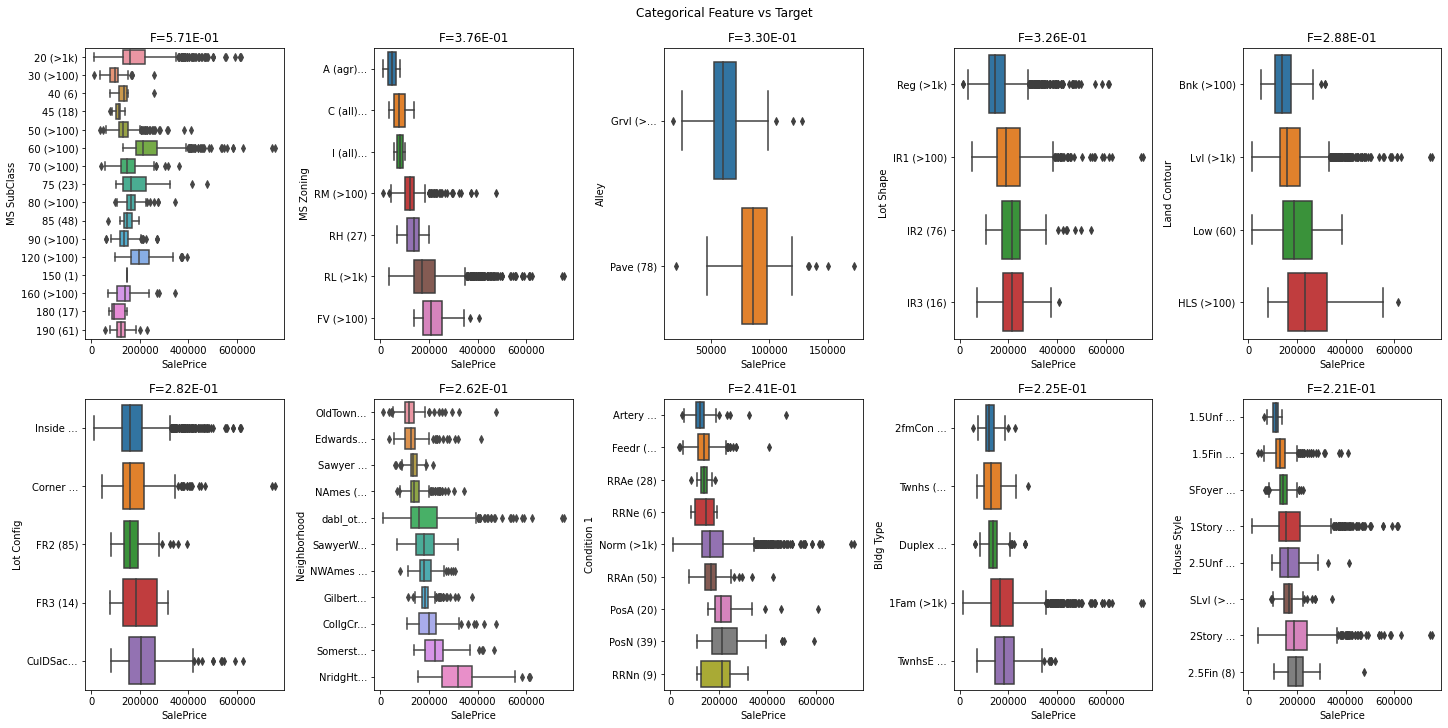

In [12]:
dabl.plot(ames_df, 'SalePrice')

You can see that high-ordinality categorical variables were summarized with rare categories binned into "dabl_other".
Also, ``GarageCars`` should maybe be plotted as a categorical variable - and there's a garage that will be build in 2200 (it's the outlier that's dropped). Huh.
We were pretty aggressive with dropping "near-constant" features. Maybe being less agressive might be good in some situations?
``Overall Qual`` might also arguably be better shown as a categorical feature, though it's a bit unclear.

/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/supervised.py:568: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/preprocessing.py:344: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 25 continuous features


/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 5 outliers in column Gr Liv Area.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 2 outliers in column Total Bsmt SF.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 4 outliers in column 1st Flr SF.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 1 outliers in column Garage Yr Blt.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 7 outliers in column Mas Vnr Area.
  int(dropped), series.name), UserWarning)
/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/plot/utils.py:661: UserWarning: Dropped 1 outliers in column TotRms A

Showing only top 10 of 43 categorical features


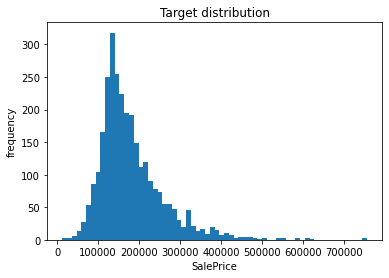

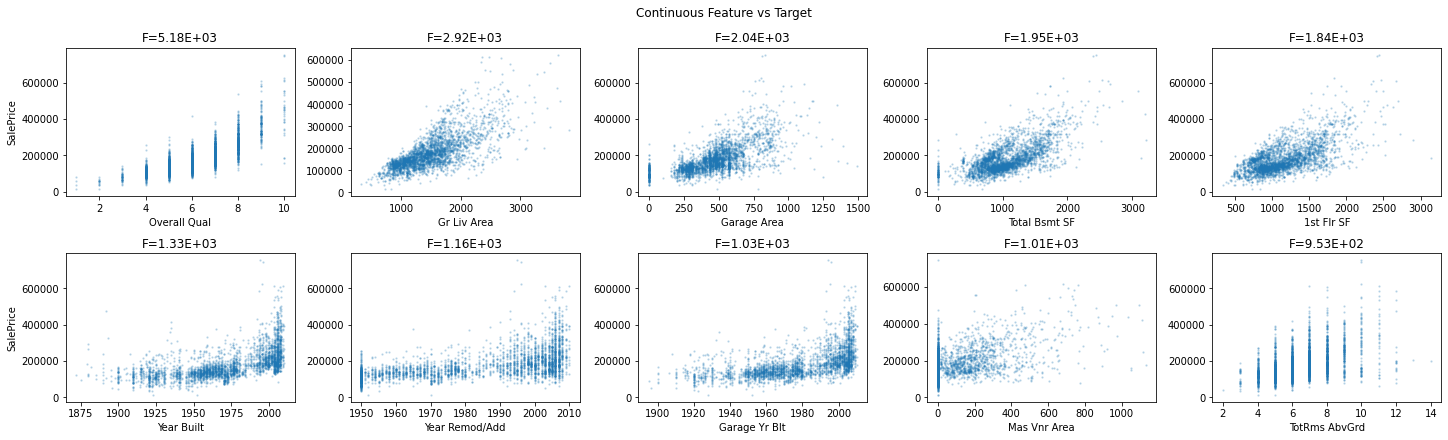

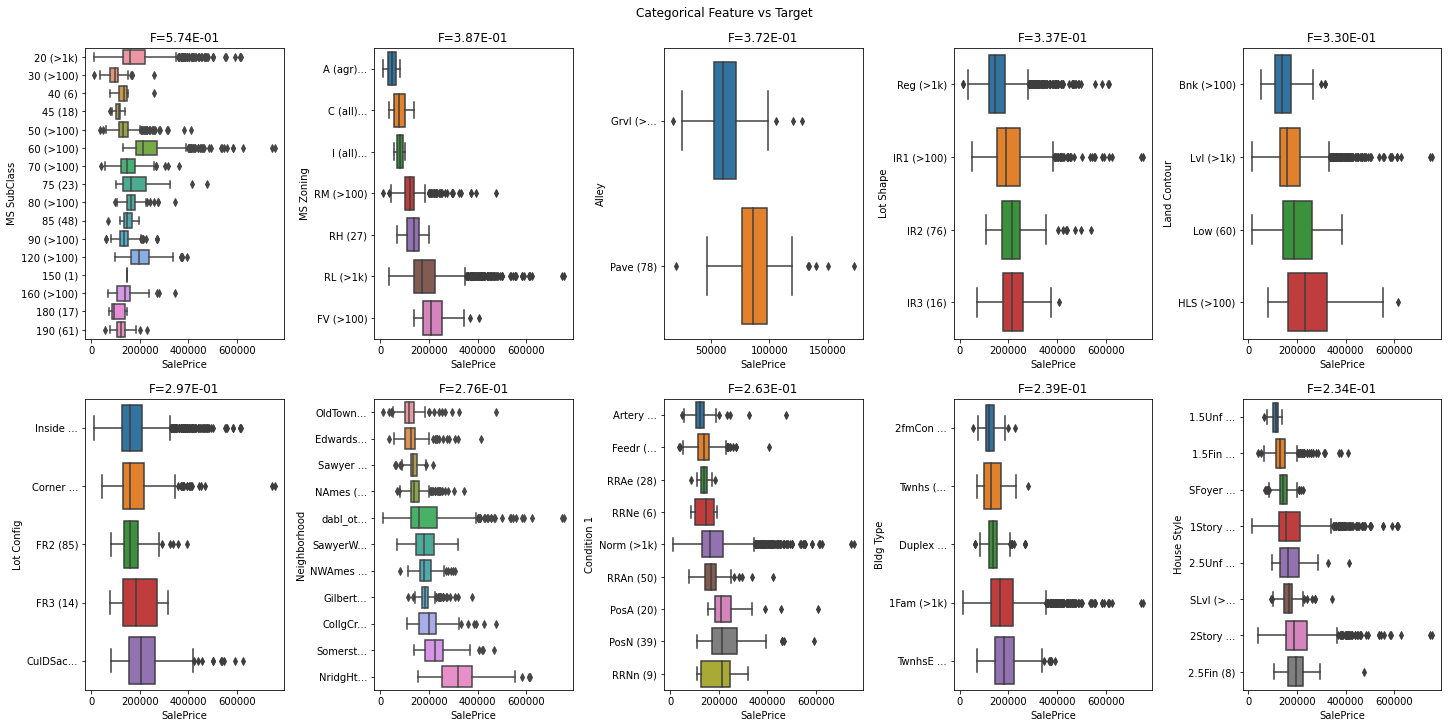

In [13]:
dabl.plot(ames_df, 'SalePrice', type_hints={'Garage Cars': 'categorical'})

In [14]:
sr = dabl.SimpleRegressor()
sr.fit(ames_df, target_col='SalePrice')

/home/ian/workspace/scratch/dabl_experiments_2/dabl/dabl/preprocessing.py:344: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Running DummyRegressor()
r2: -0.007 neg_mean_squared_error: -6394224309.087
=== new best DummyRegressor() (using r2):
r2: -0.007 neg_mean_squared_error: -6394224309.087

Running DecisionTreeRegressor(max_depth=1)
r2: 0.463 neg_mean_squared_error: -3378106460.393
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.463 neg_mean_squared_error: -3378106460.393

Running DecisionTreeRegressor(max_depth=5)
r2: 0.779 neg_mean_squared_error: -1384135053.197
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.779 neg_mean_squared_error: -1384135053.197

Running Ridge(alpha=10)
r2: 0.877 neg_mean_squared_error: -747561414.837
=== new best Ridge(alpha=10) (using r2):
r2: 0.877 neg_mean_squared_error: -747561414.837



/home/ian/miniconda3/envs/dabl_experiments_2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23885688341.30786, tolerance: 1570037456.9797292
  positive)
/home/ian/miniconda3/envs/dabl_experiments_2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57102969285.22229, tolerance: 1533827045.627244
  positive)


Running Lasso(alpha=10)
r2: 0.864 neg_mean_squared_error: -818314590.681

Best model:
Ridge(alpha=10)
Best Scores:
r2: 0.877 neg_mean_squared_error: -747561414.837


SimpleRegressor(random_state=None, refit=True, shuffle=True, type_hints=None,
                verbose=1)

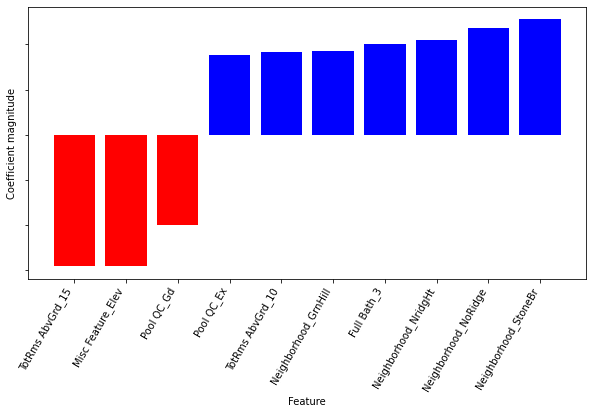

In [15]:
dabl.explain(sr)

In [16]:
# The neighborhood seems to dominate, no continuous variable is in the top 10 highest coefficients.